In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

df = pd.read_excel('IPEDS_Dataset.xlsx')

In [3]:
df

,UNITID,INSTNM,ADDR,CITY,STABBR,APPLCN,APPLCNM,APPLCNW,ADMSSN,ADMSSNM,...,NPIST2,NPIS412,NPIS422,NPIS432,NPIS442,NPIS452,OBEREG,CONTROL,HOSPITAL,OPENPUBL
0,100654,Alabama A & M University,4900 Meridian Street,Normal,AL,8907.0,2924.0,5983.0,6092.0,1932.0,...,14600,14205.0,14526.0,16532.0,20139.0,17539.0,5,1,2,1
1,100663,University of Alabama at Birmingham,Administration Bldg Suite 1070,Birmingham,AL,9947.0,3451.0,6496.0,8622.0,2870.0,...,16834,14620.0,15130.0,17379.0,20045.0,19342.0,5,1,1,1
2,100690,Amridge University,1200 Taylor Rd,Montgomery,AL,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0.0,0.0,0.0,0.0,5,2,2,1
3,100706,University of Alabama in Huntsville,301 Sparkman Dr,Huntsville,AL,5581.0,2822.0,2759.0,4359.0,2320.0,...,18588,13902.0,15703.0,18802.0,20880.0,20467.0,5,1,2,1
4,100724,Alabama State University,915 S Jackson Street,Montgomery,AL,6731.0,2147.0,4529.0,6502.0,2036.0,...,13176,13066.0,13738.0,13505.0,14414.0,15590.0,5,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6251,498535,Ivy Tech Community College of Indiana - Anderson,815 East 60th Street,Anderson,IN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,3,-3,-2,1
6252,498544,UPMC Shadyside - at UPMC Harrisburg,"Strawberry Square 320 Market Street, Suite 180",Harrisburg,PA,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,2,2,-2,1
6253,498553,Stellar Career College,"205 W. Randolph Street, Suite 200",Chicago,IL,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0.0,0.0,0.0,0.0,3,3,-2,1
6254,498562,Commonwealth University of Pennsylvania,400 East Second Street,Bloomsburg,PA,9570.0,3646.0,5924.0,8992.0,3378.0,...,17412,13700.0,14445.0,18004.0,21478.0,22785.0,2,1,2,1


In [4]:
df.shape

(6256, 30)

In [5]:
df.isnull().sum()

UNITID         0
INSTNM         0
ADDR           0
CITY           0
STABBR         0
APPLCN      4265
APPLCNM     4265
APPLCNW     4265
ADMSSN      4265
ADMSSNM     4265
ADMSSNW     4265
ENRLT       4265
ENRLM       4265
ENRLW       4265
SAINSTT     2400
SAINSTM     2400
SAINSTW     2400
GRTOTLT     2472
GRTOTLM     2472
GRTOTLW     2472
NPIST2         0
NPIS412      547
NPIS422      547
NPIS432      547
NPIS442      547
NPIS452      547
OBEREG         0
CONTROL        0
HOSPITAL       0
OPENPUBL       0
dtype: int64

In [6]:
df = df.dropna(thresh=len(df.columns) - 15)

In [7]:
df.shape

(5721, 30)

In [8]:
df.replace("#N/A", pd.NA, inplace=True)

C:\Users\kotam\AppData\Local\Temp\ipykernel_77392\2375133465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("#N/A", pd.NA, inplace=True)


In [9]:
for column in df.select_dtypes(include='number').columns:
    df[column] = df.groupby('OBEREG')[column].transform(lambda x: x.fillna(x.mean()))

C:\Users\kotam\AppData\Local\Temp\ipykernel_77392\1790333899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df.groupby('OBEREG')[column].transform(lambda x: x.fillna(x.mean()))


In [10]:
# Select numeric columns and replace negative values with 0
df[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').applymap(lambda x: max(x, 0))

C:\Users\kotam\AppData\Local\Temp\ipykernel_77392\1617514569.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').applymap(lambda x: max(x, 0))
C:\Users\kotam\AppData\Local\Temp\ipykernel_77392\1617514569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').applymap(lambda x: max(x, 0))


In [11]:
df['ENRLT'].describe()

count     5721.000000
mean       895.507325
std        895.677695
min          0.000000
25%        564.658031
50%        866.884211
75%       1005.532338
max      15151.000000
Name: ENRLT, dtype: float64

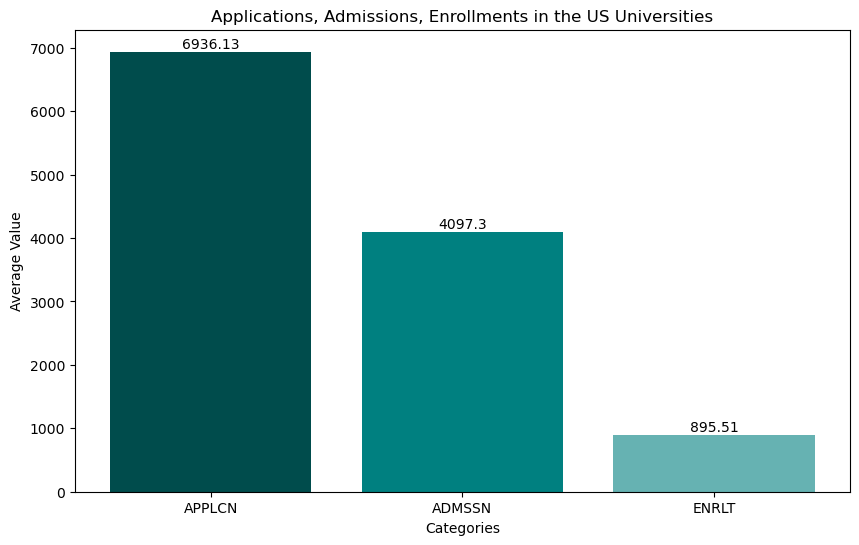

In [12]:
categories = ['APPLCN', 'ADMSSN', 'ENRLT']
values = df[['APPLCN', 'ADMSSN', 'ENRLT']].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values,  color = ['#004C4C', '#008080', '#66B2B2']  )

# Labeling the bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval, 2), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Average Value')
plt.title('Applications, Admissions, Enrollments in the US Universities')

# Displaying the plot
plt.show()

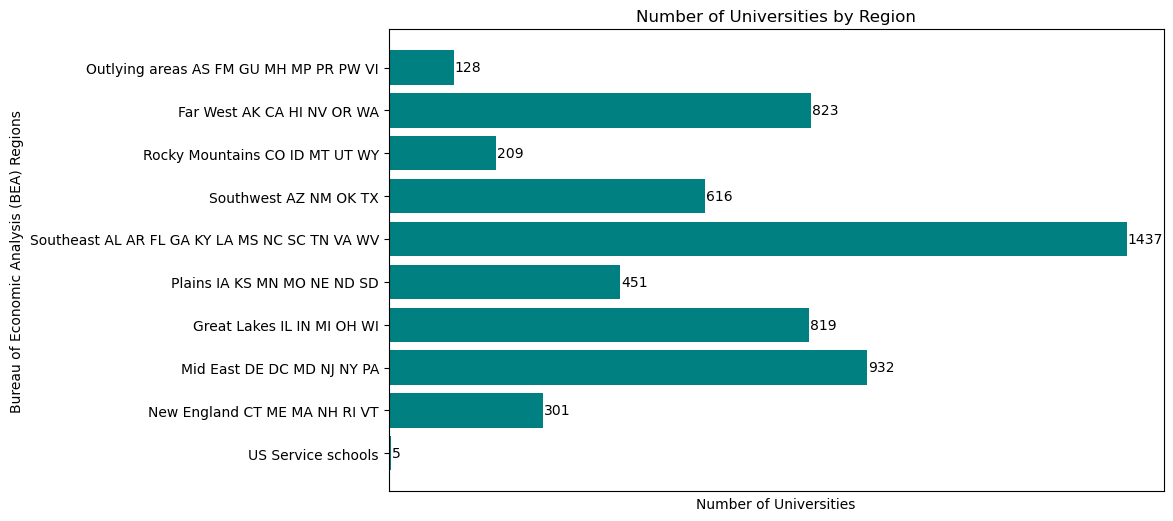

In [13]:
import matplotlib.pyplot as plt

# Sample dictionary mapping OBEREG codes to region names
region_labels = {
    0 : 'US Service schools',
    1 : 'New England CT ME MA NH RI VT',
    2 : 'Mid East DE DC MD NJ NY PA',
    3 : 'Great Lakes IL IN MI OH WI',
    4 : 'Plains IA KS MN MO NE ND SD',
    5 : 'Southeast AL AR FL GA KY LA MS NC SC TN VA WV',
    6 : 'Southwest AZ NM OK TX',
    7 : 'Rocky Mountains CO ID MT UT WY',
    8 : 'Far West AK CA HI NV OR WA',
    9 : 'Outlying areas AS FM GU MH MP PR PW VI'
}
# Count the number of universities in each region
region_counts = df['OBEREG'].value_counts().sort_index()  # Ensure alignment with region_labels

# Replace OBEREG codes with region names
region_names = [region_labels[code] for code in region_counts.index]

# Plotting a horizontal bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(region_names, region_counts.values, color='#008080')

# Adding labels to the right side of each bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1, bar.get_y() + bar.get_height()/2, int(xval), va='center')

# Adding labels and title
plt.xlabel('Number of Universities')
plt.ylabel('Bureau of Economic Analysis (BEA) Regions')
plt.title('Number of Universities by Region')

# Removing x-axis labels if desired
plt.xticks([])

# Display the plot
plt.show()

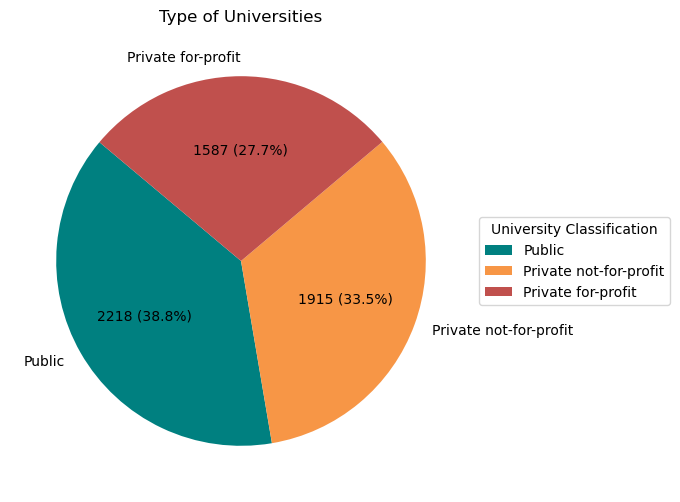

In [14]:
# Data for each department
type_of_university = ['Public', 'Private not-for-profit', 'Private for-profit']
counts = df['CONTROL'].value_counts()

# Colors for each department
colors = ['#008080', '#f79646', '#c0504d']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=type_of_university, autopct=lambda p: f'{int(p * sum(counts) / 100)} ({p:.1f}%)', startangle=140, colors=colors)

# Adding a legend
plt.legend(type_of_university, title="University Classification", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adding a title
plt.title('Type of Universities')

# Display the plot
plt.show()


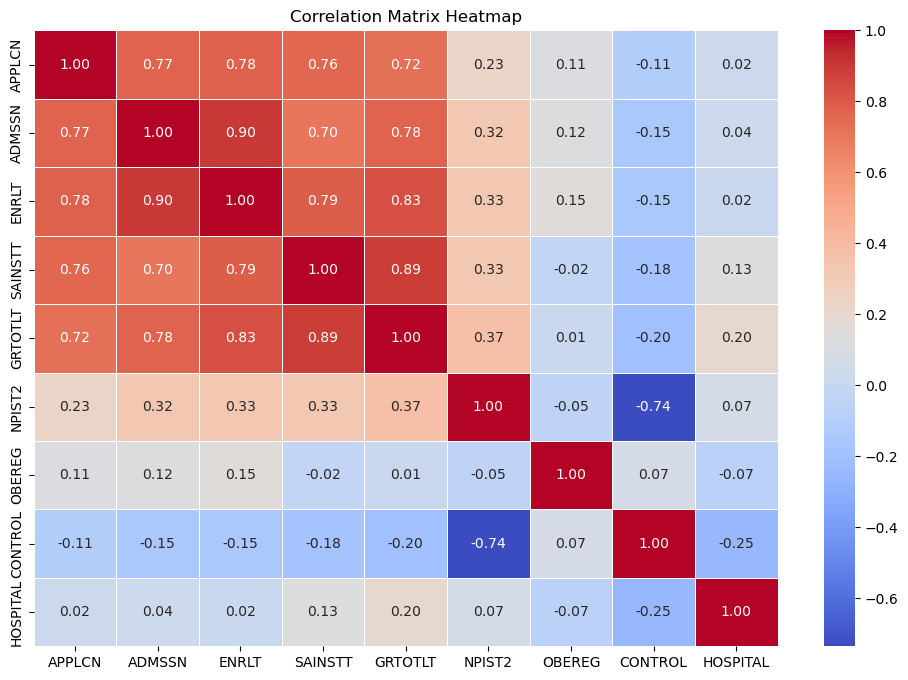

In [15]:
import seaborn as sns
df_corr = df[['APPLCN', 'ADMSSN', 'ENRLT', 'SAINSTT', 'GRTOTLT', 'NPIST2', 'OBEREG', 'CONTROL', 'HOSPITAL']]
correlation_matrix = df_corr.corr()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the plot
plt.title("Correlation Matrix Heatmap")
plt.show()

C:\Users\kotam\AppData\Local\Temp\ipykernel_77392\3798911677.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{values[i]:,.0f}', ha='center', va='bottom', fontweight='bold')


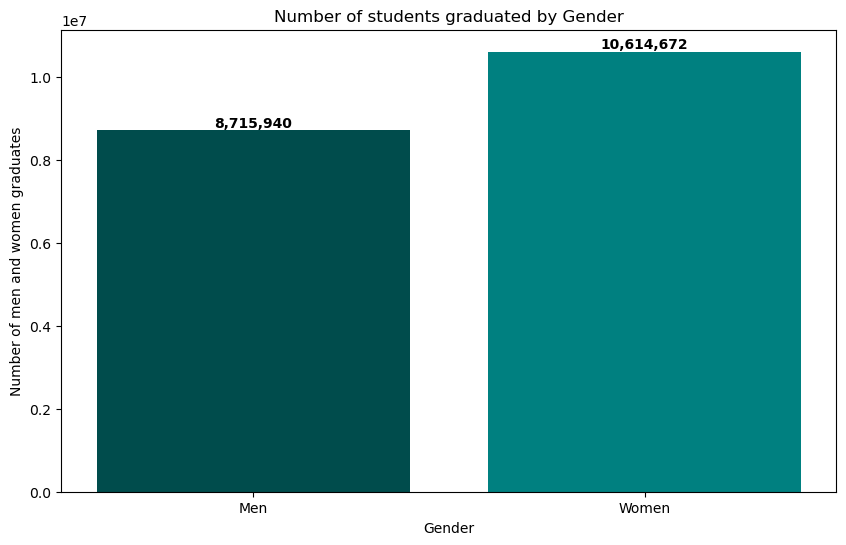

In [16]:
categories = ['Men', 'Women']
values = df[['GRTOTLM', 'GRTOTLW']].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values,  color = ['#004C4C', '#008080']  )

# Labeling the bars with values
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,
             f'{values[i]:,.0f}', ha='center', va='bottom', fontweight='bold')

# Adding labels and title
plt.ylabel('Number of men and women graduates')
plt.xlabel('Gender')
plt.title('Number of students graduated by Gender')

# Displaying the plot
plt.show()

In [17]:
df_corr.describe()

,APPLCN,ADMSSN,ENRLT,SAINSTT,GRTOTLT,NPIST2,OBEREG,CONTROL,HOSPITAL
count,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000,5721.000000
mean,6936.126333,4097.298471,895.507325,344.662272,3461.678746,3409.723300,4.633106,2.053138,0.816116
std,8013.201360,3903.812132,895.677695,515.376818,5160.187274,5754.009477,2.180367,0.848471,0.976163
min,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,3022.575130,2203.020725,564.658031,98.000000,819.000000,0.000000,3.000000,1.000000,0.000000
50%,6573.614537,3935.085903,866.884211,324.000000,3008.000000,0.000000,5.000000,2.000000,0.000000
75%,7645.648855,5316.577114,1005.532338,368.291581,3608.754386,6503.000000,6.000000,3.000000,2.000000
max,149801.000000,61739.000000,15151.000000,8414.000000,72219.000000,45657.000000,9.000000,3.000000,2.000000


## Modelling

In [18]:
# Installing dmba library for data and business analytics
!pip install dmba

In [19]:
# Installing python libraries for modelling
import pandas as pd
import dmba
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from dmba import regressionSummary
from sklearn.preprocessing import StandardScaler
from dmba import classificationSummary
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Set the predictors and outcome variables
predictors =  ['APPLCN', 'ADMSSN', 'SAINSTT', 'GRTOTLT',  'NPIST2',  'OBEREG', 'CONTROL', 'HOSPITAL']
outcome = 'ENRLT'

# Assign the data for the predictors and outcome variable
X = df[predictors]
y = df[outcome]

# Split the data into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

## Linear Regression

                            OLS Regression Results                            
Dep. Variable:                  ENRLT   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     5108.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:11:39   Log-Likelihood:                -41003.
No. Observations:                5721   AIC:                         8.202e+04
Df Residuals:                    5712   BIC:                         8.208e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.2575     22.326      0.952      0.3

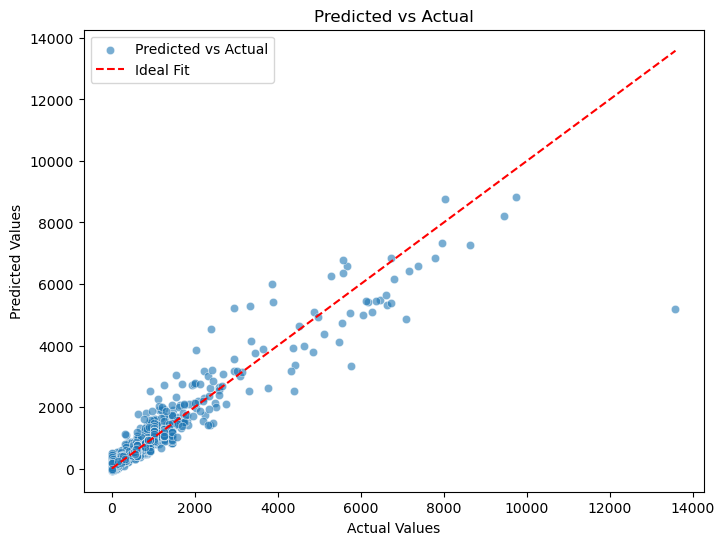

In [26]:
# Fit the OLS regression model
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

y_pred = model.predict(sm.add_constant(valid_X))

# Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=valid_y, y=y_pred, alpha=0.6, label='Predicted vs Actual')  # Adding transparency and label
plt.plot([min(valid_y), max(valid_y)], [min(valid_y), max(valid_y)], 
         color='red', linestyle='--', label='Ideal Fit')  # Ideal line
plt.title("Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


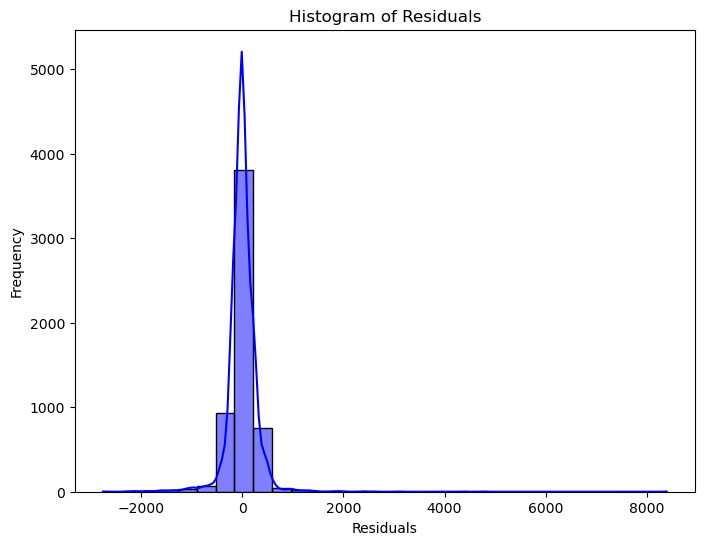

In [28]:
# Histogram of Residuals
residuals = y - model.predict(sm.add_constant(X))
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Histogram of Residuals")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Random Forest Regression

In [30]:
# Initialize and fit the Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(train_X, train_y)

# Predict on test data
y_pred = rf_regressor.predict(valid_X)

# Evaluate the model
mse = mean_squared_error(valid_y, y_pred)
r2 = r2_score(valid_y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 93698.18987195693
R^2 Score: 0.8853653851742873


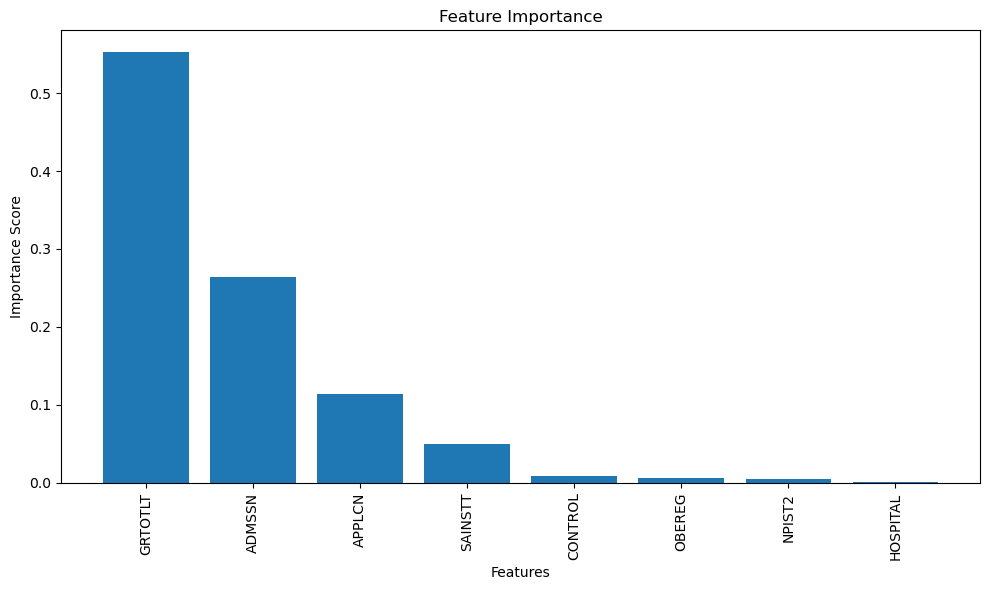

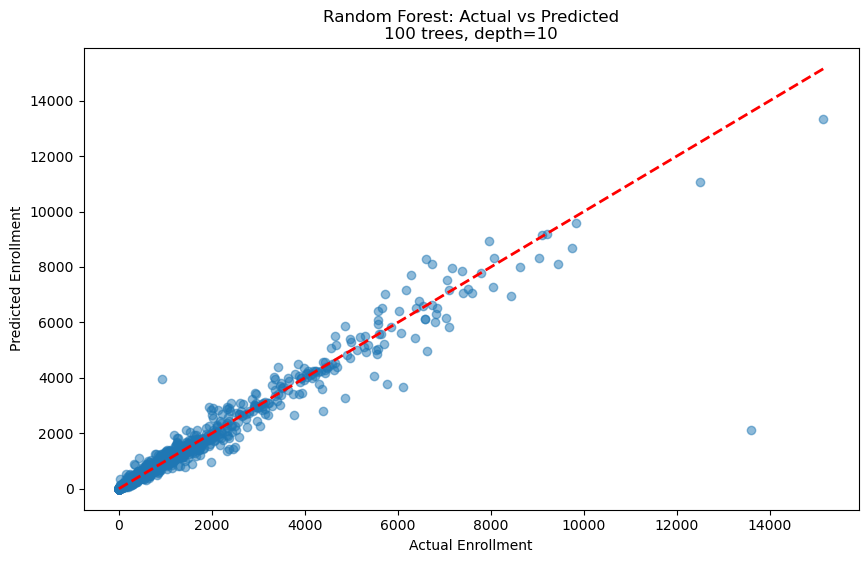

In [33]:
# Feature importances from the Random Forest model
importances = rf_regressor.feature_importances_  
feature_names = X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X.shape[1])]

# Sort features by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# Prediction Visualization
best_rf_model = rf_results[best_config]['Model']
rf_full_predictions = best_rf_model.predict(scaler.transform(X))

plt.figure(figsize=(10, 6))
plt.scatter(y, rf_full_predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title(f'Random Forest: Actual vs Predicted\n{best_config}')
plt.xlabel('Actual Enrollment')
plt.ylabel('Predicted Enrollment')
plt.show()
